/tmp/ipykernel_25467/3299001407.py:30: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  'year_of_shock': pct_changes_1971_2013.idxmin(axis=1),


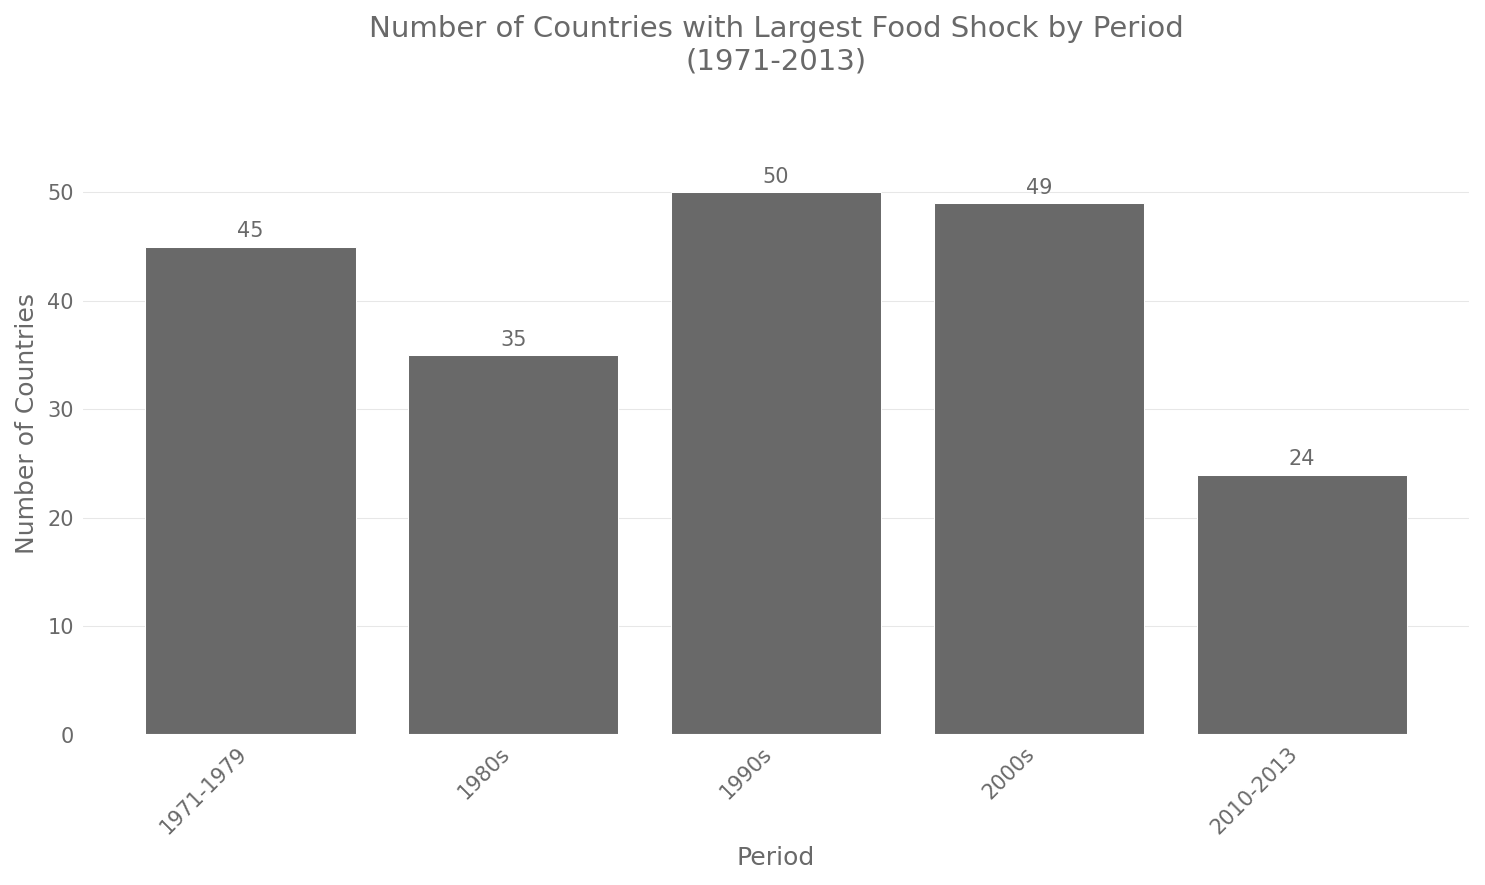

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

# Set up ALLFED plotting style
plt.style.use(
    "https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle"
)

# Add src directory to path to import our functions
sys.path.append('../src')
from calculate_food_shocks import calculate_changes_savgol

# Load the original calorie data
data = pd.read_csv("../results/calories_by_countries.csv", index_col=0)

# Convert column names to integers for easier filtering
data.columns = data.columns.astype(int)

# Process 1971-2013 data (43-year period)
years_1971_2013 = [col for col in data.columns if 1971 <= col <= 2013]
cropped_data_1971_2013 = data[years_1971_2013]

# Calculate percentage changes for 1971-2013 period
pct_changes_1971_2013 = calculate_changes_savgol(cropped_data_1971_2013, window_length=15, polyorder=3)

# Find the largest shock for each country during 1971-2013
largest_shocks_1971_2013 = pd.DataFrame({
    'country': pct_changes_1971_2013.index,
    'year_of_shock': pct_changes_1971_2013.idxmin(axis=1),
    'largest_food_shock': pct_changes_1971_2013.min(axis=1)
})

# Remove any countries with no valid shocks
largest_shocks_1971_2013 = largest_shocks_1971_2013.dropna()

# Group by standard decades first (same logic as original)
largest_shocks_1971_2013["decade"] = largest_shocks_1971_2013["year_of_shock"].apply(
    lambda x: f"{int(x//10)*10}s"
)

# Count countries per decade for 1971-2013 period
decade_counts_1971_2013 = largest_shocks_1971_2013["decade"].value_counts().sort_index()

# Create mapping for custom labels
decade_label_mapping = {
    "1970s": "1971-1979",
    "1980s": "1980s", 
    "1990s": "1990s",
    "2000s": "2000s",
    "2010s": "2010-2013"
}

# Apply custom labels while preserving the original grouping
decade_counts_1971_2013.index = decade_counts_1971_2013.index.map(decade_label_mapping)

# Define the desired order for plotting
desired_order = ["1971-1979", "1980s", "1990s", "2000s", "2010-2013"]

# Reindex to ensure proper sorting and fill missing periods with 0
decade_counts_1971_2013 = decade_counts_1971_2013.reindex(desired_order, fill_value=0)

# Create visualization for 1971-2013 analysis
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    decade_counts_1971_2013.index,
    decade_counts_1971_2013.values,
    color='dimgrey',
    edgecolor='white',
    linewidth=0.5
)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.set_xlabel("Period", fontsize=12)
ax.set_ylabel("Number of Countries", fontsize=12)
ax.set_title("Number of Countries with Largest Food Shock by Period\n(1971-2013)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")
ax.grid(True, axis="y", alpha=0.3)
ax.xaxis.grid(False)
ax.set_axisbelow(True)
ax.set_ylim(0, max(decade_counts_1971_2013.values) * 1.15)
plt.tight_layout()
plt.show()